# Directional Derivatives - Last Token

In [1]:
import numpy as np
import json
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from IPython.display import display, HTML

In [2]:
grads = np.load('results/short/last_token/short_gradients_70B_quant.npz')
tokens = np.load('results/short/last_token/short_generated_tokens_70B_quant.npz')
with open('data/movies_test.json', 'r') as file:
    movies = json.load(file)

In [3]:
all_tokens = []
all_gradients = []
for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            all_tokens.extend(tokens[f'example_{sentiment}_{example_index}'])
            all_gradients.extend(grads[f'example_{sentiment}_{example_index}'])
all_tokens = np.array(all_tokens).tolist()
all_gradients = np.array(all_gradients).tolist()

In [4]:
sorted_pairs = sorted(zip(all_gradients, all_tokens))

In [5]:
for pair in sorted_pairs[:10]:
    print(pair)

(-0.1705489158630371, ' portrayal')
(-0.14482617378234863, '<|eot_id|>')
(-0.14096294343471527, ' the')
(-0.13992060720920563, ' the')
(-0.13591378927230835, ' and')
(-0.13541452586650848, ' master')
(-0.12973520159721375, ' and')
(-0.12126298248767853, ' performance')
(-0.12097039818763733, ' master')
(-0.11875877529382706, ' led')


In [6]:
for pair in sorted_pairs[-10:]:
    print(pair)

(0.1351516842842102, ' setting')
(0.13732463121414185, ' true')
(0.1384964883327484, ' remarkable')
(0.141157329082489, ' you')
(0.14202697575092316, ' captivating')
(0.1462801694869995, ' we')
(0.14979203045368195, ' captivating')
(0.15700671076774597, '"B')
(0.16684700548648834, ' stunning')
(0.25445571541786194, '"')


In [7]:
global_min = np.min(all_gradients)
global_max = np.max(all_gradients)


cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256)

for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            gradient_values = grads[f'example_{sentiment}_{example_index}']
            normalized_gradients = [
                grad / global_max if grad > 0 else grad / -global_min if grad < 0 else grad
                for grad in gradient_values
            ]
            token_values = tokens[f'example_{sentiment}_{example_index}']

            prompt = movies[example_index]

            html = f'<div style="margin-bottom: 20px;"><strong>Example {example_index + 1}:</strong> {prompt}: {sentiment}</div>'
            html += '<div style="display: flex; flex-wrap: wrap;">'
            
            for token, grad in zip(token_values, normalized_gradients):
                hex_color = rgb2hex(cmap((grad + 1) / 2)[:3])
                unnormalized_grad = grad * global_max if grad > 0 else grad * -global_min if grad < 0 else grad
                html += f'''
                    <div style="background-color: {hex_color}; color: black; padding: 5px; margin: 0; border: none; 
                    display: inline-block; text-align: center; box-sizing: border-box; cursor: pointer;" 
                    title="Unnormalized gradient: {unnormalized_grad}, Normalized gradient: {grad}">
                        {token}
                    </div>
                '''
                
            html += '</div>'
            display(HTML(html))

# Projections - Last Token

In [8]:
import numpy as np
import json
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from IPython.display import display, HTML

In [9]:
projections = np.load('results/short/last_token/short_projections_70B_quant.npz')
tokens = np.load('results/short/last_token/short_generated_tokens_70B_quant.npz')
with open('data/movies_test.json', 'r') as file:
    movies = json.load(file)

In [10]:
all_tokens = []
all_projections = []
for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            all_tokens.extend(tokens[f'example_{sentiment}_{example_index}'])
            all_projections.extend(projections[f'example_{sentiment}_{example_index}'])
all_tokens = np.array(all_tokens).tolist()
all_projections = np.array(all_projections).tolist()

In [11]:
sorted_pairs = sorted(zip(all_projections, all_tokens))

In [12]:
for pair in sorted_pairs[:10]:
    print(pair)

(-35.444889068603516, 'rafted')
(-31.29536247253418, 'row')
(-30.56884765625, 'aling')
(-30.47443962097168, 'aton')
(-30.373790740966797, ' tensions')
(-29.64603042602539, 'row')
(-29.527793884277344, 'arming')
(-29.336257934570312, 'irth')
(-29.1511287689209, 'v')
(-29.019813537597656, 'aire')


In [13]:
for pair in sorted_pairs[-10:]:
    print(pair)

(9.448904037475586, 'Despite')
(9.50732135772705, '"')
(9.728211402893066, '"The')
(9.7496337890625, '"The')
(9.80933666229248, 'Sh')
(10.35110092163086, '"')
(10.634428024291992, '"')
(11.071922302246094, '"The')
(11.887165069580078, '"')
(13.166465759277344, 'Sh')


In [14]:
global_min = np.min(all_projections)
global_max = np.max(all_projections)


cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256)

for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            projection_values = projections[f'example_{sentiment}_{example_index}']
            normalized_projections = [
                projection / global_max if projection > 0 else projection / -global_min if projection < 0 else projection
                for projection in projection_values
            ]
            token_values = tokens[f'example_{sentiment}_{example_index}']

            prompt = movies[example_index]

            html = f'<div style="margin-bottom: 20px;"><strong>Example {example_index + 1}:</strong> {prompt}: {sentiment}</div>'
            html += '<div style="display: flex; flex-wrap: wrap;">'
            
            for token, projection in zip(token_values, normalized_projections):
                hex_color = rgb2hex(cmap((projection + 1) / 2)[:3])
                unnormalized_projection = projection * global_max if projection > 0 else projection * -global_min if projection < 0 else projection
                html += f'''
                    <div style="background-color: {hex_color}; color: black; padding: 5px; margin: 0; border: none; 
                    display: inline-block; text-align: center; box-sizing: border-box; cursor: pointer;" 
                    title="Unnormalized projection: {unnormalized_projection}, Normalized gradient: {projection}">
                        {token}
                    </div>
                '''
                
            html += '</div>'
            display(HTML(html))

# Directional Derivatives - All Tokens

In [15]:
import numpy as np
import json
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from IPython.display import display, HTML

In [16]:
grads = np.load('results/short/all_tokens/short_gradients_70B_quant.npz')
tokens = np.load('results/short/all_tokens/short_generated_tokens_70B_quant.npz')
with open('data/movies_test.json', 'r') as file:
    movies = json.load(file)

In [17]:
all_tokens = []
all_gradients = []
for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            all_tokens.extend(tokens[f'example_{sentiment}_{example_index}'])
            all_gradients.extend(grads[f'example_{sentiment}_{example_index}'])
all_tokens = np.array(all_tokens).tolist()
all_gradients = np.array(all_gradients).tolist()

In [18]:
sorted_pairs = sorted(zip(all_gradients, all_tokens))

In [19]:
for pair in sorted_pairs[:10]:
    print(pair)

(-0.8705276846885681, ' scene')
(-0.8350499272346497, ' and')
(-0.7815043926239014, ' and')
(-0.6219218969345093, ' led')
(-0.6214061975479126, ' overly')
(-0.6164871454238892, ' a')
(-0.5678595304489136, ' charming')
(-0.5623106360435486, ' overly')
(-0.5255235433578491, ' talented')
(-0.5179173350334167, ' poorly')


In [20]:
for pair in sorted_pairs[-10:]:
    print(pair)

(0.632067859172821, ',')
(0.6857826113700867, ',')
(0.690650224685669, ' "')
(0.7768914103507996, ' stunning')
(0.7976348996162415, ' delightful')
(0.8015195727348328, ' unforgettable')
(0.9371227622032166, ' outstanding')
(0.9820874929428101, ' remarkable')
(1.257770299911499, ' stunning')
(1.2703450918197632, ' outstanding')


In [21]:
global_min = np.min(all_gradients)
global_max = np.max(all_gradients)


cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256)

for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            gradient_values = grads[f'example_{sentiment}_{example_index}']
            normalized_gradients = [
                grad / global_max if grad > 0 else grad / -global_min if grad < 0 else grad
                for grad in gradient_values
            ]
            token_values = tokens[f'example_{sentiment}_{example_index}']

            prompt = movies[example_index]

            html = f'<div style="margin-bottom: 20px;"><strong>Example {example_index + 1}:</strong> {prompt}: {sentiment}</div>'
            html += '<div style="display: flex; flex-wrap: wrap;">'
            
            for token, grad in zip(token_values, normalized_gradients):
                hex_color = rgb2hex(cmap((grad + 1) / 2)[:3])
                unnormalized_grad = grad * global_max if grad > 0 else grad * -global_min if grad < 0 else grad
                html += f'''
                    <div style="background-color: {hex_color}; color: black; padding: 5px; margin: 0; border: none; 
                    display: inline-block; text-align: center; box-sizing: border-box; cursor: pointer;" 
                    title="Unnormalized gradient: {unnormalized_grad}, Normalized gradient: {grad}">
                        {token}
                    </div>
                '''
                
            html += '</div>'
            display(HTML(html))

# Projections - All Tokens

In [22]:
import numpy as np
import json
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from IPython.display import display, HTML

In [23]:
projections = np.load('results/short/all_tokens/short_projections_70B_quant.npz')
tokens = np.load('results/short/all_tokens/short_generated_tokens_70B_quant.npz')
with open('data/movies_test.json', 'r') as file:
    movies = json.load(file)

In [24]:
all_tokens = []
all_projections = []
for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            all_tokens.extend(tokens[f'example_{sentiment}_{example_index}'])
            all_projections.extend(projections[f'example_{sentiment}_{example_index}'])
all_tokens = np.array(all_tokens).tolist()
all_projections = np.array(all_projections).tolist()

In [25]:
sorted_pairs = sorted(zip(all_projections, all_tokens))

In [26]:
for pair in sorted_pairs[:10]:
    print(pair)

(-114.90274047851562, ' overly')
(-107.66368865966797, ' dull')
(-107.07809448242188, ' clich')
(-106.39137268066406, ' un')
(-106.24156188964844, ' a')
(-105.83712005615234, ' somewhat')
(-103.65835571289062, ' conv')
(-101.41009521484375, ' dry')
(-98.56953430175781, ' contr')
(-97.40864562988281, ' predictable')


In [27]:
for pair in sorted_pairs[-10:]:
    print(pair)

(59.64099884033203, ' we')
(60.58314514160156, ' master')
(60.871681213378906, ' we')
(61.333274841308594, ' pays')
(61.73038864135742, ' master')
(64.21415710449219, ' brings')
(68.06806182861328, ' master')
(69.7771224975586, ' shines')
(71.72386169433594, ' master')
(71.9638671875, ' master')


In [28]:
global_min = np.min(all_projections)
global_max = np.max(all_projections)


cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256)

for example_index in range(10):
    for sentiment in ['negative', 'positive']:
        if f'example_{sentiment}_{example_index}' in tokens:
            projection_values = projections[f'example_{sentiment}_{example_index}']
            normalized_projections = [
                projection / global_max if projection > 0 else projection / -global_min if projection < 0 else projection
                for projection in projection_values
            ]
            token_values = tokens[f'example_{sentiment}_{example_index}']

            prompt = movies[example_index]

            html = f'<div style="margin-bottom: 20px;"><strong>Example {example_index + 1}:</strong> {prompt}: {sentiment}</div>'
            html += '<div style="display: flex; flex-wrap: wrap;">'
            
            for token, projection in zip(token_values, normalized_projections):
                hex_color = rgb2hex(cmap((projection + 1) / 2)[:3])
                unnormalized_projection = projection * global_max if projection > 0 else projection * -global_min if projection < 0 else projection
                html += f'''
                    <div style="background-color: {hex_color}; color: black; padding: 5px; margin: 0; border: none; 
                    display: inline-block; text-align: center; box-sizing: border-box; cursor: pointer;" 
                    title="Unnormalized projection: {unnormalized_projection}, Normalized gradient: {projection}">
                        {token}
                    </div>
                '''
                
            html += '</div>'
            display(HTML(html))

# Global Directional Derivatives - Positive Review - Common Tokens

In [29]:
import numpy as np
import transformers

/uufs/chpc.utah.edu/common/home/u1307785/software/pkg/miniforge3/envs/concepts/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
tokens = np.load('results/short/all_tokens/short_generated_tokens_global_positive_70B_quant.npy')
global_grads = np.load('results/short/all_tokens/short_gradients_global_top_70B_quant.npy')
tokens_of_interest = np.load('data/1000_tokens.npy')

In [31]:
tokenizer = transformers.AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-70B-Instruct")

In [32]:
n = 10
np.set_printoptions(precision=3, suppress=True)
for token, grads in zip(tokens, global_grads):
    print(f"Chosen token: {repr(token)}")
    indexed_grads = list(enumerate(grads))
    sorted_indexed_grads = sorted(indexed_grads, key=lambda x: x[1])
    bottom_n = sorted_indexed_grads[:n]
    bottom_n_decoded = [(repr(tokenizer.decode(tokens_of_interest[i[0]])), round(float(i[1]), 3)) for i in bottom_n]
    print(f"Bottom {n}: {bottom_n_decoded}")
    top_n = sorted_indexed_grads[-n:]
    top_n_decoded = [(repr(tokenizer.decode(tokens_of_interest[i[0]])), round(float(i[1]), 3)) for i in top_n]
    print(f"Top {n}: {top_n_decoded}")
    print("\n----------------------------------------------------------------------------\n")

Chosen token: np.str_('\n\n')
Bottom 10: [("'<|begin_of_text|>'", -0.444), ('"\'."', -0.436), ("'it'", -0.372), ("'..'", -0.358), ('"\'"', -0.345), ("'A'", -0.315), ("'but'", -0.218), ("' war'", -0.188), ("' title'", -0.17), ("'.'", -0.164)]
Top 10: [("' W'", 1.469), ('\',"\'', 1.514), ("' R'", 1.526), ("' supporting'", 1.579), ("' get'", 1.616), ("'!!'", 1.62), ("'!'", 1.895), ("'!!!'", 1.9), ("' '", 2.03), ('\'!"\'', 2.234)]

----------------------------------------------------------------------------

Chosen token: np.str_('"B')
Bottom 10: [("'as'", -1.759), ("'it'", -1.678), ("'2'", -1.638), ("'b'", -1.577), ("'es'", -1.524), ("'ar'", -1.486), ("'but'", -1.473), ("'less'", -1.404), ("'d'", -1.377), ("'<|begin_of_text|>'", -1.369)]
Top 10: [("' R'", 0.805), ("' happy'", 0.821), ('\'!"\'', 0.843), ("' for'", 0.88), ("' amazing'", 0.952), ("' brilliant'", 0.96), ("' final'", 1.036), ("','", 1.133), ('\' "\'', 1.209), ("' '", 1.394)]

---------------------------------------------------

# Global Directional Derivatives -  Negative Review - Sentiment Related Tokens

In [33]:
import numpy as np
import transformers
import matplotlib.pyplot as plt

In [34]:
tokens = np.load('results/short/all_tokens/short_generated_tokens_global_negative_70B_quant.npy')
global_grads = np.load('results/short/all_tokens/short_gradients_global_sentiment_negative_70B_quant.npy')
tokens_of_interest = np.load('data/sentiment_tokens.npy')

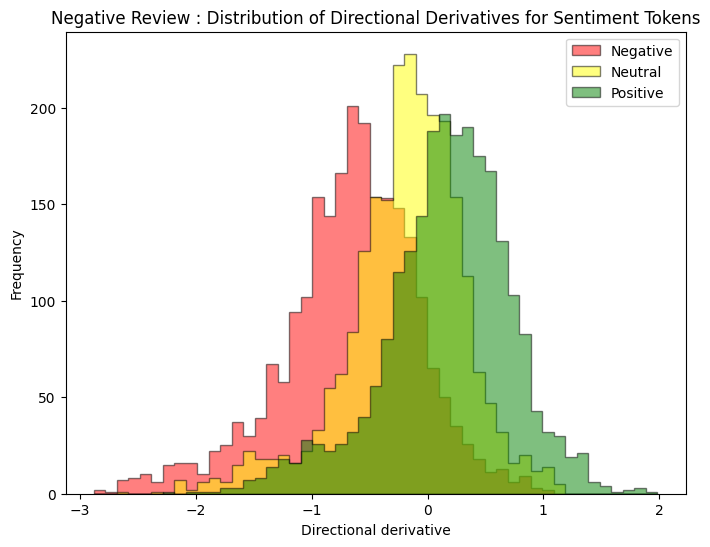

In [35]:
all_negative = global_grads[:, :50].flatten()
all_neutral = global_grads[:, 50:100].flatten()
all_positive = global_grads[:, 100:].flatten()
bins = np.linspace(np.min(global_grads), np.max(global_grads), 50)
plt.figure(figsize=(8, 6))
plt.hist(all_negative, bins=bins, alpha=0.5, label='Negative', color='red', histtype='stepfilled', edgecolor='black')
plt.hist(all_neutral, bins=bins, alpha=0.5, label='Neutral', color='yellow', histtype='stepfilled', edgecolor='black')
plt.hist(all_positive, bins=bins, alpha=0.5, label='Positive',color='green', histtype='stepfilled', edgecolor='black')
plt.xlabel('Directional derivative')
plt.ylabel('Frequency')
plt.title('Negative Review : Distribution of Directional Derivatives for Sentiment Tokens')
plt.legend()
plt.show()

In [36]:
tokenizer = transformers.AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-70B-Instruct")

In [37]:
for token, grads in zip(tokens, global_grads):
    print(f"Chosen token: {repr(token)}")
    decoded = [(repr(tokenizer.decode(i[0])), round(float(i[1]), 3)) for i in zip(tokens_of_interest, grads)]
    print(f"Negative tokens: {decoded[:25]}")
    print(f"Mean: {round(float(np.mean(grads[:25])), 3)}")
    print(f"Positive tokens: {decoded[-25:]}")
    print(f"Mean: {round(float(np.mean(grads[-25:])), 3)}")
    print("\n----------------------------------------------------------------------------\n")

Chosen token: np.str_('\n\n')
Negative tokens: [("' boring'", 0.663), ("' predictable'", 0.119), ("' horrible'", 0.712), ("' awkward'", 0.989), ("' stale'", 0.266), ("' frustrating'", 0.689), ("' repetitive'", 0.692), ("' tedious'", 0.409), ("' cheesy'", 0.584), ("' weak'", 0.299), ("' dull'", 0.435), ("' hollow'", 0.679), ("' awful'", 0.602), ("' disappointing'", 0.183), ("' rushed'", 0.837), ("' shallow'", 0.711), ("' mediocre'", 0.366), ("' bland'", 0.483), ("' irritating'", 0.895), ("' lacking'", 0.32), ("' disconnected'", -0.021), ("' forced'", 0.313), ("' unnecessary'", 0.455), ("' flawed'", 0.6), ("' sloppy'", 0.315)]
Mean: 0.504
Positive tokens: [("' heavenly'", 0.89), ("' outstanding'", 1.318), ("' peaceful'", 0.453), ("' fabulous'", 0.901), ("' inviting'", 0.713), ("' wholesome'", 0.736), ("' majestic'", 0.521), ("' stimulating'", 0.48), ("' creative'", 0.744), ("' thoughtful'", 0.887), ("' admired'", 0.532), ("' breathtaking'", 0.599), ("' graceful'", 0.737), ("' exquisite'"

# Global Directional Derivatives - Positive Review - Sentiment Related Tokens

In [38]:
import numpy as np
import transformers
import matplotlib.pyplot as plt

In [39]:
tokens = np.load('results/short/all_tokens/short_generated_tokens_global_positive_70B_quant.npy')
global_grads = np.load('results/short/all_tokens/short_gradients_global_sentiment_positive_70B_quant.npy')
tokens_of_interest = np.load('data/sentiment_tokens.npy')

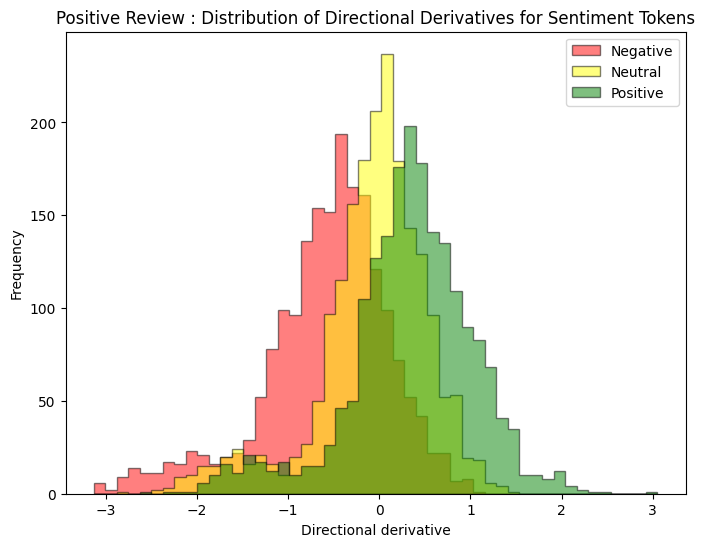

In [40]:
all_negative = global_grads[:, :50].flatten()
all_neutral = global_grads[:, 50:100].flatten()
all_positive = global_grads[:, 100:].flatten()
bins = np.linspace(np.min(global_grads), np.max(global_grads), 50)
plt.figure(figsize=(8, 6))
plt.hist(all_negative, bins=bins, alpha=0.5, label='Negative', color='red', histtype='stepfilled', edgecolor='black')
plt.hist(all_neutral, bins=bins, alpha=0.5, label='Neutral', color='yellow', histtype='stepfilled', edgecolor='black')
plt.hist(all_positive, bins=bins, alpha=0.5, label='Positive',color='green', histtype='stepfilled', edgecolor='black')
plt.xlabel('Directional derivative')
plt.ylabel('Frequency')
plt.title('Positive Review : Distribution of Directional Derivatives for Sentiment Tokens')
plt.legend()
plt.show()

In [41]:
tokenizer = transformers.AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-70B-Instruct")

In [42]:
for token, grads in zip(tokens, global_grads):
    print(f"Chosen token: {repr(token)}")
    decoded = [(repr(tokenizer.decode(i[0])), round(float(i[1]), 3)) for i in zip(tokens_of_interest, grads)]
    print(f"Negative tokens: {decoded[:25]}")
    print(f"Mean: {round(float(np.mean(grads[:25])), 3)}")
    print(f"Positive tokens: {decoded[-25:]}")
    print(f"Mean: {round(float(np.mean(grads[-25:])), 3)}")
    print("\n----------------------------------------------------------------------------\n")

Chosen token: np.str_('\n\n')
Negative tokens: [("' boring'", 0.659), ("' predictable'", 0.15), ("' horrible'", 0.673), ("' awkward'", 0.956), ("' stale'", 0.239), ("' frustrating'", 0.729), ("' repetitive'", 0.693), ("' tedious'", 0.367), ("' cheesy'", 0.644), ("' weak'", 0.396), ("' dull'", 0.382), ("' hollow'", 0.635), ("' awful'", 0.54), ("' disappointing'", 0.202), ("' rushed'", 0.82), ("' shallow'", 0.713), ("' mediocre'", 0.365), ("' bland'", 0.449), ("' irritating'", 0.943), ("' lacking'", 0.328), ("' disconnected'", -0.0), ("' forced'", 0.368), ("' unnecessary'", 0.44), ("' flawed'", 0.629), ("' sloppy'", 0.441)]
Mean: 0.511
Positive tokens: [("' heavenly'", 0.934), ("' outstanding'", 1.331), ("' peaceful'", 0.516), ("' fabulous'", 1.015), ("' inviting'", 0.713), ("' wholesome'", 0.751), ("' majestic'", 0.521), ("' stimulating'", 0.501), ("' creative'", 0.812), ("' thoughtful'", 0.935), ("' admired'", 0.543), ("' breathtaking'", 0.691), ("' graceful'", 0.688), ("' exquisite'",